In [213]:
import pandas as pd
import numpy as np
import random
import re
import json
import math
import pprint
import requests
# import pandas_profiling
from scipy.stats import zscore
from collections import defaultdict
from urllib.request import urlopen, Request
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Lahore Property Rents.csv")
df.head()

,Unnamed: 0,Type,Price,Location,Baths,Area,Beds
0,0,Upper Portion,PKR45 Thousand,"Wapda Town, Lahore, Punjab",3,10 Marla,2
1,1,Upper Portion,PKR40 Thousand,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3
2,2,Upper Portion,PKR47 Thousand,"Wapda Town, Lahore, Punjab",2,10 Marla,2
3,3,House,PKR5.95 Lakh,"Gulberg, Lahore, Punjab",7,2 Kanal,6
4,4,House,PKR5 Lakh,"Muslim Town, Lahore, Punjab",7,2 Kanal,5


In [3]:
# Checking cities
print(df["Location"].unique())
df.shape

['Wapda Town, Lahore, Punjab' 'Expo Avenue Society, Lahore, Punjab'
 'Gulberg, Lahore, Punjab' 'Muslim Town, Lahore, Punjab'
 'Government Employees Cooperative Housing Society (GECHS), Lahore, Punjab'
 'Garden Town, Lahore, Punjab' 'Township, Lahore, Punjab'
 'Architects Engineers Housing Society, Lahore, Punjab'
 'Bahria Town, Lahore, Punjab' 'Raiwind Road, Lahore, Punjab'
 'Military Accounts Housing Society, Lahore, Punjab'
 'Pak Arab Housing Society, Lahore, Punjab' 'DHA Defence, Lahore, Punjab'
 'Sui Gas Housing Society, Lahore, Punjab'
 'Park View City, Lahore, Punjab' 'Al Rehman Garden, Lahore, Punjab'
 'Beacon House Society, Lahore, Punjab' 'Eden, Lahore, Punjab'
 'Sultan Town, Lahore, Punjab' 'Cavalry Ground, Lahore, Punjab'
 'Nasheman-e-Iqbal, Lahore, Punjab' 'Divine Gardens, Lahore, Punjab'
 'Jail Road, Lahore, Punjab' 'Paragon City, Lahore, Punjab'
 'Airport Road, Lahore, Punjab' 'Ring Road, Lahore, Punjab'
 'Cantt, Lahore, Punjab' 'Bahria Nasheman, Lahore, Punjab'
 'Garhi S

(20510, 7)

In [4]:
df.isna().sum()

Unnamed: 0    0
Type          0
Price         0
Location      0
Baths         0
Area          0
Beds          0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Type', 'Price', 'Location', 'Baths', 'Area', 'Beds'], dtype='object')

In [6]:
df = df.rename(columns={'Unnamed: 0': 'Num'})

In [7]:
df.columns

Index(['Num', 'Type', 'Price', 'Location', 'Baths', 'Area', 'Beds'], dtype='object')

In [8]:
df['Type'].unique()

array(['Upper Portion', 'House', 'Lower Portion', 'Room', 'Flat',
       'Farm House', 'Penthouse', 'Home'], dtype=object)

In [9]:
df['Area'].unique()

array(['10 Marla', '2 Kanal', '4 Kanal', '1 Kanal', '2.1 Kanal',
       '5 Marla', '2.4 Marla', '3 Marla', '3.6 Marla', '8 Marla',
       '2.5 Marla', '1.8 Marla', '3.1 Marla', '2.2 Marla', '13 Marla',
       '1.5 Kanal', '4 Marla', '6 Marla', '12 Marla', '7 Marla',
       '18 Marla', '1.6 Kanal', '1.2 Kanal', '12.4 Marla', '3.3 Marla',
       '3.8 Marla', '5.4 Marla', '5.5 Marla', '5.9 Marla', '1.2 Marla',
       '7.5 Marla', '1.3 Marla', '15 Marla', '2.1 Marla', '17 Marla',
       '1 Marla', '2 Marla', '5.3 Marla', '14 Marla', '2.7 Marla',
       '2.3 Marla', '1.7 Marla', '3 Kanal', '0.7 Marla', '11.1 Marla',
       '11 Marla', '1.1 Kanal', '3.4 Marla', '1.1 Marla', '9 Marla',
       '7.6 Marla', '1.5 Marla', '16 Marla', '6.5 Marla', '1.4 Marla',
       '2.9 Marla', '1.9 Marla', '2.8 Marla', '2.5 Kanal', '3.5 Marla',
       '1.4 Kanal', '3.5 Kanal', '7.2 Marla', '9.9 Marla', '4.4 Marla',
       '0.1 Marla', '8.8 Marla', '2.6 Marla', '9.5 Marla', '8.9 Marla',
       '12.5 Marla', '0.5

In [10]:
df['Price'].unique()

array(['PKR45 Thousand', 'PKR40 Thousand', 'PKR47 Thousand',
       'PKR5.95 Lakh', 'PKR5 Lakh', 'PKR15 Lakh', 'PKR4.1 Lakh',
       'PKR4.5 Lakh', 'PKR9.5 Lakh', 'PKR30 Thousand', 'PKR5.5 Lakh',
       'PKR4 Lakh', 'PKR18 Thousand', 'PKR22 Thousand', 'PKR55 Thousand',
       'PKR28 Thousand', 'PKR46 Thousand', 'PKR37 Thousand',
       'PKR36 Thousand', 'PKR75 Thousand', 'PKR50 Thousand',
       'PKR1.4 Lakh', 'PKR13 Thousand', 'PKR65 Thousand', 'PKR1.1 Lakh',
       'PKR2.9 Lakh', 'PKR92 Thousand', 'PKR1.64 Lakh', 'PKR1.45 Lakh',
       'PKR90 Thousand', 'PKR60 Thousand', 'PKR95 Thousand',
       'PKR70 Thousand', 'PKR1.9 Lakh', 'PKR53 Thousand', 'PKR1 Lakh',
       'PKR3.5 Lakh', 'PKR2.8 Lakh', 'PKR2 Lakh', 'PKR3 Lakh',
       'PKR3.35 Lakh', 'PKR3.3 Lakh', 'PKR3.4 Lakh', 'PKR1.8 Lakh',
       'PKR1.5 Lakh', 'PKR2.6 Lakh', 'PKR80 Thousand', 'PKR3.7 Lakh',
       'PKR2.3 Lakh', 'PKR15 Thousand', 'PKR25 Thousand',
       'PKR23 Thousand', 'PKR1.3 Lakh', 'PKR1.85 Lakh', 'PKR38 Thousand'

In [11]:
 df['Price'] = df['Price'].str.replace('PKR', '')

In [12]:
#convert thousand into 1000 and lakh into 100000

In [13]:
df['Price'] = df['Price'].apply(lambda x: int(float(x.split()[0]) * 1000) if 'Thousand' in x else int(float(x.split()[0]) * 100000) if 'Lakh' in x else int(x))


In [14]:
df['Price'].head(10)

0      45000
1      40000
2      47000
3     595000
4     500000
5    1500000
6    1500000
7     409999
8     450000
9     950000
Name: Price, dtype: int64

In [15]:
df.head()

,Num,Type,Price,Location,Baths,Area,Beds
0,0,Upper Portion,45000,"Wapda Town, Lahore, Punjab",3,10 Marla,2
1,1,Upper Portion,40000,"Expo Avenue Society, Lahore, Punjab",3,10 Marla,3
2,2,Upper Portion,47000,"Wapda Town, Lahore, Punjab",2,10 Marla,2
3,3,House,595000,"Gulberg, Lahore, Punjab",7,2 Kanal,6
4,4,House,500000,"Muslim Town, Lahore, Punjab",7,2 Kanal,5


In [16]:
df['Baths'].unique()

array(['3', '2', '7', '10', '6', '8', '5', '1', '4', '-', '9'],
      dtype=object)

In [17]:
df['Baths'].isna().sum()

0

In [18]:
df[df['Baths'] == '-']

,Num,Type,Price,Location,Baths,Area,Beds
137,137,House,120000,"Park View City, Lahore, Punjab",-,10 Marla,-
170,170,Upper Portion,28000,"Park View City, Lahore, Punjab",-,5 Marla,-
320,320,House,175000,"Valencia Housing Society, Lahore, Punjab",-,1 Kanal,-
321,321,Upper Portion,35000,"Eden, Lahore, Punjab",-,5 Marla,-
322,322,Upper Portion,45000,"DHA 11 Rahbar, Lahore, Punjab",-,5 Marla,-
...,...,...,...,...,...,...,...
20449,20449,House,600000,"Gulberg, Lahore, Punjab",-,2 Kanal,10
20478,20478,House,200000,"Gulberg, Lahore, Punjab",-,1 Kanal,9
20479,20479,House,400000,"Gulberg, Lahore, Punjab",-,2 Kanal,12
20487,20487,House,180000,"Gulberg, Lahore, Punjab",-,1 Kanal,10


In [19]:
# define a lambda function that generates random numbers
random_num = lambda x: random.randint(0, 10) if x == '-' else x

In [20]:
# apply the lambda function to column Baths
df['Baths'] = df['Baths'].apply(random_num)

In [21]:
df[df['Beds'] == '-']

,Num,Type,Price,Location,Baths,Area,Beds
137,137,House,120000,"Park View City, Lahore, Punjab",0,10 Marla,-
170,170,Upper Portion,28000,"Park View City, Lahore, Punjab",10,5 Marla,-
320,320,House,175000,"Valencia Housing Society, Lahore, Punjab",9,1 Kanal,-
321,321,Upper Portion,35000,"Eden, Lahore, Punjab",2,5 Marla,-
322,322,Upper Portion,45000,"DHA 11 Rahbar, Lahore, Punjab",2,5 Marla,-
...,...,...,...,...,...,...,...
20247,20247,House,195000,"DHA Defence, Lahore, Punjab",9,1 Kanal,-
20273,20273,House,30000,"Cantt, Lahore, Punjab",6,3 Marla,-
20284,20284,Upper Portion,47000,"EME Society, Lahore, Punjab",3,1 Kanal,-
20431,20431,Room,14000,"Shershah Colony - Raiwind Road, Lahore, Punjab",6,0.5 Marla,-


In [22]:
# apply the lambda function to column Beds
df['Beds'] = df['Beds'].apply(random_num)

In [23]:
df['Beds'] = df['Beds'].astype(int)

In [24]:
df[df['Beds']>10]

,Num,Type,Price,Location,Baths,Area,Beds
2460,2460,Room,60000,"Allama Iqbal Town, Lahore, Punjab",2,15 Marla,12
3146,3146,House,350000,"Gulberg, Lahore, Punjab",7,2 Kanal,11
4170,4170,House,1000000,"Gulberg, Lahore, Punjab",10,5 Kanal,11
5580,5580,House,160000,"Architects Engineers Housing Society, Lahore, ...",10,1 Kanal,11
5909,5909,House,1500000,"Garden Town, Lahore, Punjab",10,4 Kanal,11
6999,6999,House,375000,"Gulberg, Lahore, Punjab",5,2 Kanal,12
7002,7002,House,1200000,"Gulberg, Lahore, Punjab",2,4 Kanal,12
7080,7080,House,375000,"Gulberg, Lahore, Punjab",6,2 Kanal,12
7083,7083,House,1200000,"Gulberg, Lahore, Punjab",5,4 Kanal,12
7727,7727,House,1500000,"Defence Road, Lahore, Punjab",10,4 Kanal,11


In [25]:
df = df.drop(df[(df['Beds'] > 10) & (df['Type'] == 'Room')].index)

In [26]:
df = df.drop(df[(df['Beds'] > 10) & (df['Price'] < 50000)].index)

In [27]:
df[df['Beds']>10]

,Num,Type,Price,Location,Baths,Area,Beds
3146,3146,House,350000,"Gulberg, Lahore, Punjab",7,2 Kanal,11
4170,4170,House,1000000,"Gulberg, Lahore, Punjab",10,5 Kanal,11
5580,5580,House,160000,"Architects Engineers Housing Society, Lahore, ...",10,1 Kanal,11
5909,5909,House,1500000,"Garden Town, Lahore, Punjab",10,4 Kanal,11
6999,6999,House,375000,"Gulberg, Lahore, Punjab",5,2 Kanal,12
7002,7002,House,1200000,"Gulberg, Lahore, Punjab",2,4 Kanal,12
7080,7080,House,375000,"Gulberg, Lahore, Punjab",6,2 Kanal,12
7083,7083,House,1200000,"Gulberg, Lahore, Punjab",5,4 Kanal,12
7727,7727,House,1500000,"Defence Road, Lahore, Punjab",10,4 Kanal,11
7799,7799,House,1500000,"Defence Road, Lahore, Punjab",10,4 Kanal,11


In [28]:
df['Baths'] = df['Baths'].astype(int)

In [29]:
df = df.drop(df[(df['Beds'] > 10) & (df['Baths'] < 5)].index)

In [30]:
#converting area into sqrt ft 
import re

def convert_to_sqft(area):
    area = str(area)
    if 'Marla' in area:
        area = float(re.sub(r'\D+', '', area)) * 272.251
    elif 'Kanal' in area:
        area = float(re.sub(r'\D+', '', area)) * 5445
    return area



In [31]:
df['Area'] = df['Area'].apply(convert_to_sqft)

In [32]:
df.columns

Index(['Num', 'Type', 'Price', 'Location', 'Baths', 'Area', 'Beds'], dtype='object')

In [33]:
df = df.rename(columns={'Area': 'Area sqrft'})

In [34]:
df.columns

Index(['Num', 'Type', 'Price', 'Location', 'Baths', 'Area sqrft', 'Beds'], dtype='object')

In [35]:
df.head()

,Num,Type,Price,Location,Baths,Area sqrft,Beds
0,0,Upper Portion,45000,"Wapda Town, Lahore, Punjab",3,2722.51,2
1,1,Upper Portion,40000,"Expo Avenue Society, Lahore, Punjab",3,2722.51,3
2,2,Upper Portion,47000,"Wapda Town, Lahore, Punjab",2,2722.51,2
3,3,House,595000,"Gulberg, Lahore, Punjab",7,10890.00,6
4,4,House,500000,"Muslim Town, Lahore, Punjab",7,10890.00,5


In [36]:
#now calculating price per square ft
df['price_per_sqft'] = df['Price'] / df['Area sqrft']
df.head(10)

,Num,Type,Price,Location,Baths,Area sqrft,Beds,price_per_sqft
0,0,Upper Portion,45000,"Wapda Town, Lahore, Punjab",3,2722.51,2,16.528865
1,1,Upper Portion,40000,"Expo Avenue Society, Lahore, Punjab",3,2722.51,3,14.692324
2,2,Upper Portion,47000,"Wapda Town, Lahore, Punjab",2,2722.51,2,17.263481
3,3,House,595000,"Gulberg, Lahore, Punjab",7,10890.00,6,54.637282
4,4,House,500000,"Muslim Town, Lahore, Punjab",7,10890.00,5,45.913682
5,5,House,1500000,"Gulberg, Lahore, Punjab",7,21780.00,6,68.870523
6,6,House,1500000,"Gulberg, Lahore, Punjab",10,21780.00,6,68.870523
7,7,House,409999,"Gulberg, Lahore, Punjab",6,5445.00,5,75.298255
8,8,House,450000,"Gulberg, Lahore, Punjab",6,10890.00,6,41.322314
9,9,House,950000,"Gulberg, Lahore, Punjab",10,114345.00,6,8.308190


In [37]:
df[df['Type'] == 'House']

,Num,Type,Price,Location,Baths,Area sqrft,Beds,price_per_sqft
3,3,House,595000,"Gulberg, Lahore, Punjab",7,10890.00,6,54.637282
4,4,House,500000,"Muslim Town, Lahore, Punjab",7,10890.00,5,45.913682
5,5,House,1500000,"Gulberg, Lahore, Punjab",7,21780.00,6,68.870523
6,6,House,1500000,"Gulberg, Lahore, Punjab",10,21780.00,6,68.870523
7,7,House,409999,"Gulberg, Lahore, Punjab",6,5445.00,5,75.298255
...,...,...,...,...,...,...,...,...
20498,20498,House,130000,"Gulberg, Lahore, Punjab",6,2722.51,5,47.750054
20499,20499,House,95000,"Gulberg, Lahore, Punjab",7,2722.51,7,34.894270
20500,20500,House,100000,"Gulberg, Lahore, Punjab",5,2722.51,5,36.730811
20502,20502,House,130000,"Gulberg, Lahore, Punjab",5,2722.51,5,47.750054


In [38]:
df['Location'] = df['Location'].str.replace(', Lahore, Punjab', '')

In [39]:
df.head()

,Num,Type,Price,Location,Baths,Area sqrft,Beds,price_per_sqft
0,0,Upper Portion,45000,Wapda Town,3,2722.51,2,16.528865
1,1,Upper Portion,40000,Expo Avenue Society,3,2722.51,3,14.692324
2,2,Upper Portion,47000,Wapda Town,2,2722.51,2,17.263481
3,3,House,595000,Gulberg,7,10890.00,6,54.637282
4,4,House,500000,Muslim Town,7,10890.00,5,45.913682


In [40]:
len(df['Location'].unique())

461

In [41]:
#Number of house in every location
df['Location'] = df['Location'].apply(lambda x: x.strip())
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

Location
DHA Defence                            4942
Bahria Town                            2093
Askari                                 1178
Johar Town                             1035
Gulberg                                 720
Model Town                              536
Cantt                                   480
Wapda Town                              473
Raiwind Road                            467
DHA 11 Rahbar                           286
Paragon City                            286
Allama Iqbal Town                       278
Nasheman-e-Iqbal                        261
Valencia Housing Society                251
Bahria Orchard                          235
Garden Town                             225
Park View City                          204
Central Park Housing Scheme             200
Eden                                    190
Jubilee Town                            188
State Life Housing Society              185
Cavalry Ground                          171
Sabzazar Scheme        

In [42]:
# Removing Outliers based on Price
z = np.abs(zscore(df['Price']))
thresh = 3
outliers_indices = np.where(z > thresh)

In [43]:
# Printing Outliers
print("Number of Outliers:", len(outliers_indices[0]), "with Threshold:", thresh)
outliers_data = df.iloc[list(set(outliers_indices[0]))]

Number of Outliers: 324 with Threshold: 3


In [44]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out


In [45]:

df = remove_pps_outliers(df)
df.shape

(14106, 8)

In [46]:
df

,Num,Type,Price,Location,Baths,Area sqrft,Beds,price_per_sqft
0,7221,Upper Portion,37000,Aabpara Coop Housing Society,2,2722.510,2,13.590400
1,7523,Flat,16000,Aabpara Coop Housing Society,1,816.753,4,19.589766
2,19137,House,110000,Aabpara Coop Housing Society,7,5445.000,6,20.202020
3,5700,Upper Portion,15000,Aashiana Road,1,1089.004,3,13.774054
4,7942,Lower Portion,12000,Aashiana Road,2,816.753,2,14.692324
...,...,...,...,...,...,...,...,...
14101,7519,House,48000,Zaheer Villas,3,1089.004,3,44.076973
14102,15537,Lower Portion,20000,Zaman Colony,1,816.753,1,24.487207
14103,15550,Lower Portion,20000,Zaman Colony,1,816.753,1,24.487207
14104,9960,Lower Portion,18500,Zubaida Park,1,544.502,1,33.976000


In [47]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(14106, 8)

In [89]:
#now dividing data in X and Y
df_0 = df.drop(['Num', 'price_per_sqft'], axis = 1 )

In [90]:
df_0.head()

,Type,Price,Location,Baths,Area sqrft,Beds
0,Upper Portion,37000,Aabpara Coop Housing Society,2,2722.510,2
1,Flat,16000,Aabpara Coop Housing Society,1,816.753,4
2,House,110000,Aabpara Coop Housing Society,7,5445.000,6
3,Upper Portion,15000,Aashiana Road,1,1089.004,3
4,Lower Portion,12000,Aashiana Road,2,816.753,2


In [91]:
Y= df_0['Price']

In [92]:
X = df_0.drop(['Price'], axis = 1)

In [93]:
X.head()

,Type,Location,Baths,Area sqrft,Beds
0,Upper Portion,Aabpara Coop Housing Society,2,2722.510,2
1,Flat,Aabpara Coop Housing Society,1,816.753,4
2,House,Aabpara Coop Housing Society,7,5445.000,6
3,Upper Portion,Aashiana Road,1,1089.004,3
4,Lower Portion,Aashiana Road,2,816.753,2


In [94]:
Y.head()

0     37000
1     16000
2    110000
3     15000
4     12000
Name: Price, dtype: int64

In [95]:
X['Type'].unique()

array(['Upper Portion', 'Flat', 'House', 'Lower Portion', 'Room',
       'Penthouse', 'Farm House', 'Home'], dtype=object)

In [96]:
X = X.drop(X[X['Type'] == 'Home'].index)

In [97]:
X = X.drop(X[X['Type'] == 'Penthouse'].index)

In [98]:
X[X['Type'] == 'Farm House']

,Type,Location,Baths,Area sqrft,Beds
3374,Farm House,Bedian Road,5,16335.000,3
3375,Farm House,Bedian Road,5,5445.000,4
3376,Farm House,Bedian Road,5,4083.765,4
3377,Farm House,Bedian Road,5,21780.000,5
3378,Farm House,Bedian Road,2,21780.000,2
3379,Farm House,Bedian Road,4,21780.000,3
3380,Farm House,Bedian Road,4,21780.000,3
3381,Farm House,Bedian Road,2,21780.000,2
3382,Farm House,Bedian Road,4,21780.000,3
3383,Farm House,Bedian Road,4,21780.000,3


In [99]:
X['Type'].unique()

array(['Upper Portion', 'Flat', 'House', 'Lower Portion', 'Room',
       'Farm House'], dtype=object)

## Convert Type into numbers

In [100]:
# Define a dictionary of category-to-number mappings
category_map = {'Upper Portion': 1, 'Flat': 2, 'House': 3, 'Lower Portion': 4, 'Room': 5, 'Farm House': 6}

In [101]:
# Replace the categories with the corresponding numbers using replace
X['New_Type'] = X['Type'].replace(category_map)

In [102]:
X.head()

,Type,Location,Baths,Area sqrft,Beds,New_Type
0,Upper Portion,Aabpara Coop Housing Society,2,2722.510,2,1
1,Flat,Aabpara Coop Housing Society,1,816.753,4,2
2,House,Aabpara Coop Housing Society,7,5445.000,6,3
3,Upper Portion,Aashiana Road,1,1089.004,3,1
4,Lower Portion,Aashiana Road,2,816.753,2,4


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

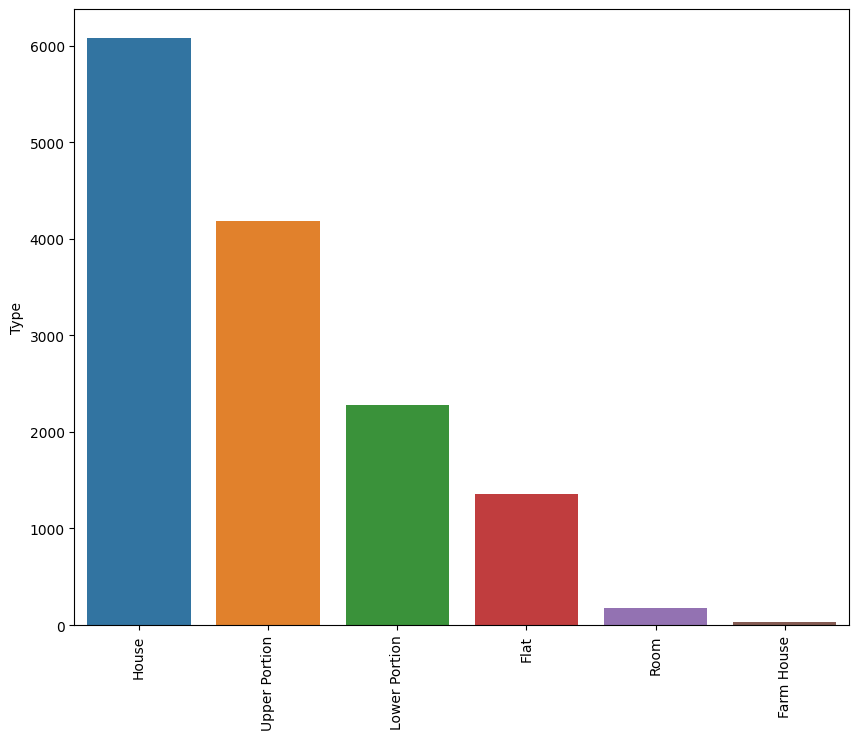

In [132]:
plt.figure(figsize=(10,8))
type = X['Type'].value_counts()
sns.barplot(x=type.index , y=type)
plt.xticks(rotation = 90)
plt.show()

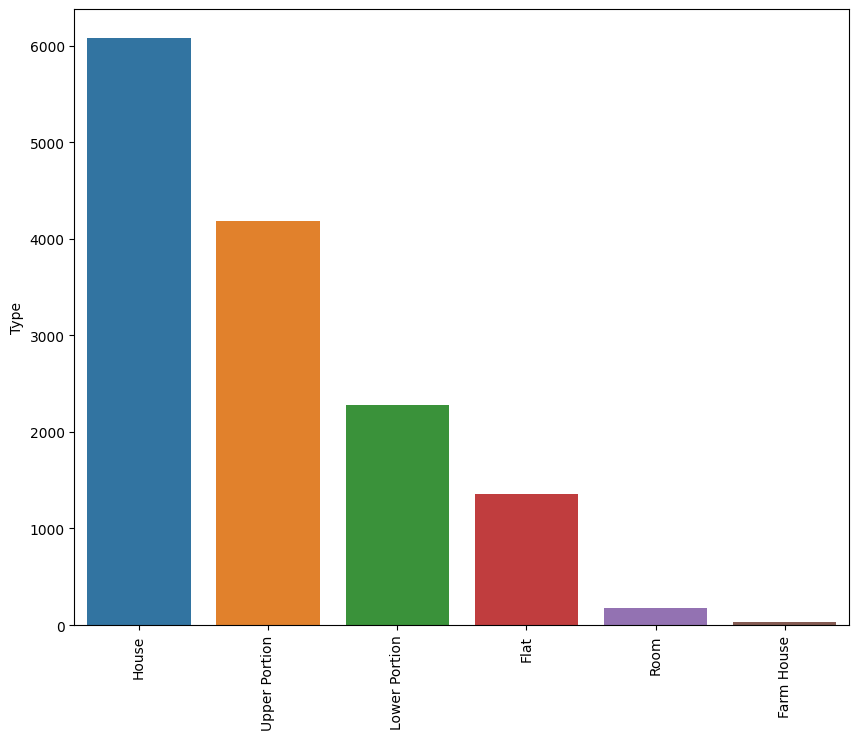

In [134]:
plt.figure(figsize=(10,8))
type = X['Type'].value_counts()
sns.barplot(x=type.index , y=type)
plt.xticks(rotation = 90)
plt.show()

In [114]:
#Now drop Type column
X1 = X.drop(['Type'], axis = 1)

In [117]:
X1.shape

(14103, 5)

In [118]:
Y.shape

(14106,)

In [120]:
Y = Y.drop(index=Y.index[-3:])

In [121]:
Y.shape

(14103,)

In [148]:
df1 = X1

In [149]:
dummies = pd.get_dummies(df1['Location'])
dummies.head(3)

,Aabpara Coop Housing Society,Aashiana Road,Abbot Road,Abdalians Cooperative Housing Society,Abdul Sattar Edhi Road,Abid Market,Agrics Town,Ahlu Road,Ahmad Avenue,Airline Housing Society,...,Walton Road,Wapda Town,Waris Colony,Waris Road,West Wood Housing Society,Women Housing Society,Yazdani Road,Zaheer Villas,Zaman Colony,Zubaida Park
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df1 = pd.concat([df1, dummies], axis="columns")
df1.head()
df1.shape

(14103, 648)

In [155]:
df1.columns

Index(['Baths', 'Area sqrft', 'Beds', 'New_Type',
       'Aabpara Coop Housing Society', 'Aashiana Road', 'Abbot Road',
       'Abdalians Cooperative Housing Society', 'Abdul Sattar Edhi Road',
       'Abid Market',
       ...
       'Walton Road', 'Wapda Town', 'Waris Colony', 'Waris Road',
       'West Wood Housing Society', 'Women Housing Society', 'Yazdani Road',
       'Zaheer Villas', 'Zaman Colony', 'Zubaida Park'],
      dtype='object', length=648)

In [240]:
X = df1

In [241]:
X.head()

,Baths,Area sqrft,Beds,New_Type,Aabpara Coop Housing Society,Aashiana Road,Abbot Road,Abdalians Cooperative Housing Society,Abdul Sattar Edhi Road,Abid Market,...,Walton Road,Wapda Town,Waris Colony,Waris Road,West Wood Housing Society,Women Housing Society,Yazdani Road,Zaheer Villas,Zaman Colony,Zubaida Park
0,2,2722.510,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,816.753,4,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,5445.000,6,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1089.004,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,816.753,2,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [243]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [244]:
# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11282, 648)
y_train shape: (11282,)
X_test shape: (2821, 648)
y_test shape: (2821,)


In [224]:
# Set up the k-fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

In [257]:
# Define the models
linear_reg = LinearRegression()
log_reg = LogisticRegression()
decision_tree_reg = DecisionTreeRegressor()
svm_reg = SVR()
random_forest_reg = RandomForestRegressor()

In [261]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [251]:
# Make predictions on the testing set
y_pred = linear_reg.predict(X_test)

In [292]:
# Evaluate the model on the test set
accuracy = random_forest_reg.score(X_test, y_test)

# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.38030104388315467


In [295]:
def predict_price(location, baths, area, bed,typee):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = area
    x[2] = bed
    x[3] = typee
    if loc_index >= 0:
        x[loc_index] = 1
    return random_forest_reg.predict([x])[0]

In [301]:
df.head()

,Num,Type,Price,Location,Baths,Area sqrft,Beds,price_per_sqft
0,7221,Upper Portion,37000,Aabpara Coop Housing Society,2,2722.510,2,13.590400
1,7523,Flat,16000,Aabpara Coop Housing Society,1,816.753,4,19.589766
2,19137,House,110000,Aabpara Coop Housing Society,7,5445.000,6,20.202020
3,5700,Upper Portion,15000,Aashiana Road,1,1089.004,3,13.774054
4,7942,Lower Portion,12000,Aashiana Road,2,816.753,2,14.692324


In [306]:

print(str(int(predict_price('Aabpara Coop Housing Society', 1, 816.753, 4,2) )) + ' PKR')

18246 PKR


C:\Users\Hamza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [308]:
import pickle
pickle.dump(random_forest_reg, open('./model.sav', 'wb'))

In [314]:
X.head()

,Baths,Area sqrft,Beds,New_Type,Aabpara Coop Housing Society,Aashiana Road,Abbot Road,Abdalians Cooperative Housing Society,Abdul Sattar Edhi Road,Abid Market,...,Walton Road,Wapda Town,Waris Colony,Waris Road,West Wood Housing Society,Women Housing Society,Yazdani Road,Zaheer Villas,Zaman Colony,Zubaida Park
0,2,2722.510,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,816.753,4,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,5445.000,6,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1089.004,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,816.753,2,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
X.to_csv('file.csv')

In [311]:
X1.to_csv('updated_p.csv')